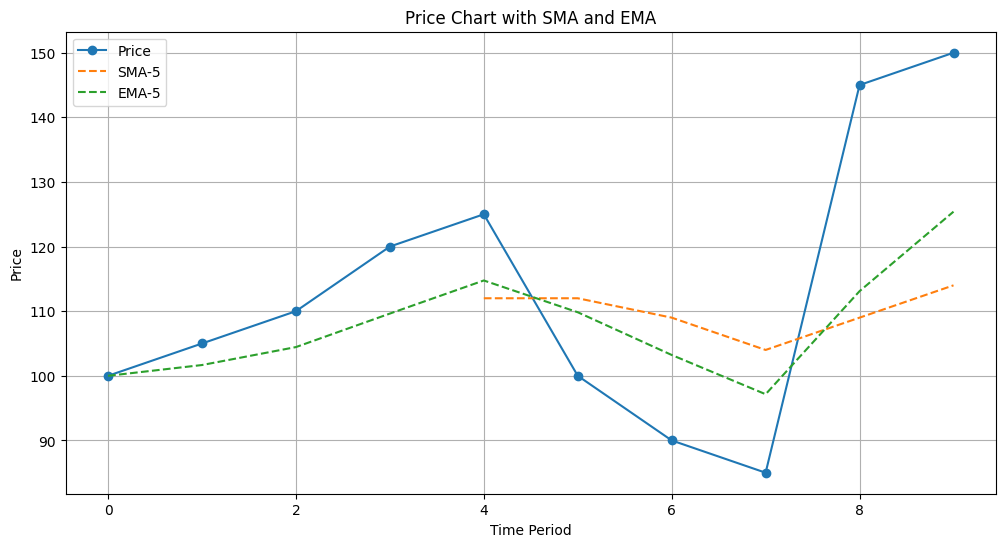

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

# Calculate SMA and EMA
window = 5  # Adjust the window size as needed
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()

# Plot the original prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
import yfinance as yf
data = yf.download(tickers='BTC-USD', period='max', interval='1d')
data

C:\Users\Admin\AppData\Local\Temp\ipykernel_24104\2475105604.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers='BTC-USD', period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-06-27,107088.429688,107772.468750,106449.992188,106954.921875,45353692675
2025-06-28,107327.703125,107567.882812,106883.976562,107090.546875,30037708335


In [67]:
import pandas_ta as ta
import pandas as pd
df = pd.read_csv("BTCUSD_Candlestick_1_D_ASK_08.05.2017-16.10.2021.csv")
a = ta.adx(df['High'], df['Low'], df['Close'], length = 14)
data = df.join(a)
a

,ADX_14,DMP_14,DMN_14
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1301,32.509560,25.177193,11.045412
1302,33.288181,26.769846,10.563393
1303,35.013623,33.427350,9.035075
1304,36.615820,31.472268,8.506636


In [64]:
data

,Gmt time,Open,High,Low,Close,Volume,ADX_14,DMP_14,DMN_14
0,07.05.2017 21:00:00.000,1559,1681,1557,1658,1.872044e+06,NaN,NaN,NaN
1,08.05.2017 21:00:00.000,1658,1753,1626,1747,1.330136e+06,NaN,NaN,NaN
2,09.05.2017 21:00:00.000,1713,1769,1677,1752,1.916895e+06,NaN,NaN,NaN
3,10.05.2017 21:00:00.000,1784,1887,1777,1857,1.613521e+06,NaN,NaN,NaN
4,11.05.2017 21:00:00.000,1836,1836,1651,1692,2.550428e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1301,12.10.2021 21:00:00.000,55433,57543,54328,57047,2.013182e+03,32.509560,25.177193,11.045412
1302,13.10.2021 21:00:00.000,57078,58568,56906,57505,2.001020e+03,33.288181,26.769846,10.563393
1303,14.10.2021 21:00:00.000,57533,62922,56940,62587,2.235774e+03,35.013623,33.427350,9.035075
1304,15.10.2021 21:00:00.000,62587,62608,60223,61077,1.943311e+03,36.615820,31.472268,8.506636


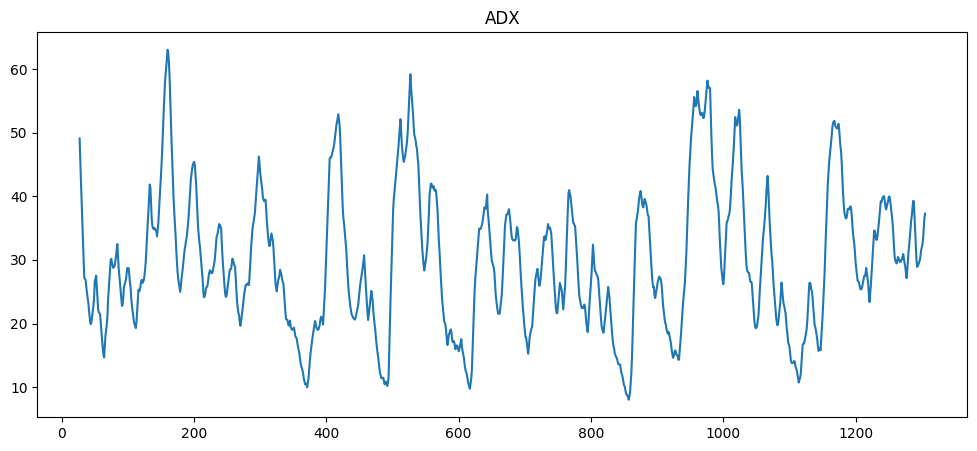

In [65]:
plt.figure(figsize=(12,5))
plt.title('ADX')
data['ADX_14'].plot()
plt.show()

In [66]:
import plotly.graph_objects as go
df = data[:500]
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='OHLC'),
                go.Scatter(x=df.index, y=df['ADX_14'], name='ADX', yaxis='y2')
                ])

fig.update_layout(
    title='OHLC with ADX(14)',
    yaxis=dict(
        domain=[0.2, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.2],
        anchor='free',
        overlaying='y',
        side='right',
        title='ADX'
    ))

fig.show()
